In [1]:
%load_ext lab_black

In [12]:
import sys
import os

# Add the parent folder to path to be able to easily access other agents
sys.path.append(os.path.abspath(os.path.join("..")))
# print("\n".join(sys.path))

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np

# Import agents to work with
from agent_v4.agent import Agent

In [15]:
def animate(imgs, _return=True):
    """
    Combines images to make a video that can be rendered in notebook
    Returns:
        video generated from images
    """
    # using cv2 to generate videos as moviepy doesn't work on kaggle notebooks
    import cv2
    import os
    import string
    import random

    video_name = (
        "".join(random.choice(string.ascii_letters) for i in range(18)) + ".webm"
    )
    height, width, layers = imgs[0].shape
    fourcc = cv2.VideoWriter_fourcc(*"VP90")
    video = cv2.VideoWriter(video_name, fourcc, 10, (width, height))

    for img in imgs:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        video.write(img)
    video.release()
    if _return:
        from IPython.display import Video

        return Video(video_name)


def interact(env, agents, steps):
    """
    Plays the agents against each other for the first <steps> of the game
    Returns:
       a video of game"""
    # reset our env
    obs = env.reset(seed=41)
    np.random.seed(0)
    imgs = []
    step = 0
    # Note that as the environment has two phases, we also keep track a value called
    # `real_env_steps` in the environment state. The first phase ends once `real_env_steps` is 0 and used below

    # iterate until phase 1 ends
    while env.state.real_env_steps < 0:
        if step >= steps:
            break
        actions = {}
        for player in env.agents:
            o = obs[player]
            a = agents[player].early_setup(step, o)
            actions[player] = a
        step += 1
        obs, rewards, dones, infos = env.step(actions)
        imgs += [env.render("rgb_array", width=640, height=640)]
    done = False
    while not done:
        if step >= steps:
            break
        actions = {}
        for player in env.agents:
            o = obs[player]
            a = agents[player].act(step, o)
            actions[player] = a
        step += 1
        obs, rewards, dones, infos = env.step(actions)
        imgs += [env.render("rgb_array", width=640, height=640)]
        done = dones["player_0"] and dones["player_1"]
    return animate(imgs)

# Make Video of Agents playing

In [16]:
env = LuxAI_S2()  # create the environment object
agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
interact(env, agents, 25)

INFO:root:initializing agent for player player_0
INFO:root:initializing agent for player player_1
INFO:root:player_0 Beginning of step update for step 0
INFO:root:player_0 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_1 Beginning of step update for step 0
INFO:root:player_1 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_0 Beginning of step update for step 1
INFO:root:player_0 Early setup action {'spawn': (2, 24), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning of step update for step 1
INFO:root:player_1 Early setup action {}
INFO:root:player_0 Beginning of step update for step 2
INFO:root:player_0 Early setup action {}
INFO:root:player_1 Beginning of step update for step 2
INFO:root:player_1 Early setup action {'spawn': (3, 30), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 3
INFO:root:player_0 Early setup action {'spawn': (4, 19), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning o

# Working with env one step at a time

In [43]:
from util import show_env

env = LuxAI_S2()

## Early Setup Phase

INFO:root:initializing agent for player player_0
INFO:root:initializing agent for player player_1
INFO:root:player_0 Beginning of step update for step 0
INFO:root:player_0 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_1 Beginning of step update for step 0
INFO:root:player_1 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_0 Beginning of step update for step 1
INFO:root:player_0 Early setup action {'spawn': (1, 9), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning of step update for step 1
INFO:root:player_1 Early setup action {}
INFO:root:player_0 Beginning of step update for step 2
INFO:root:player_0 Early setup action {}
INFO:root:player_1 Beginning of step update for step 2
INFO:root:player_1 Early setup action {'spawn': (2, 15), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 3
INFO:root:player_0 Early setup action {'spawn': (4, 27), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning of

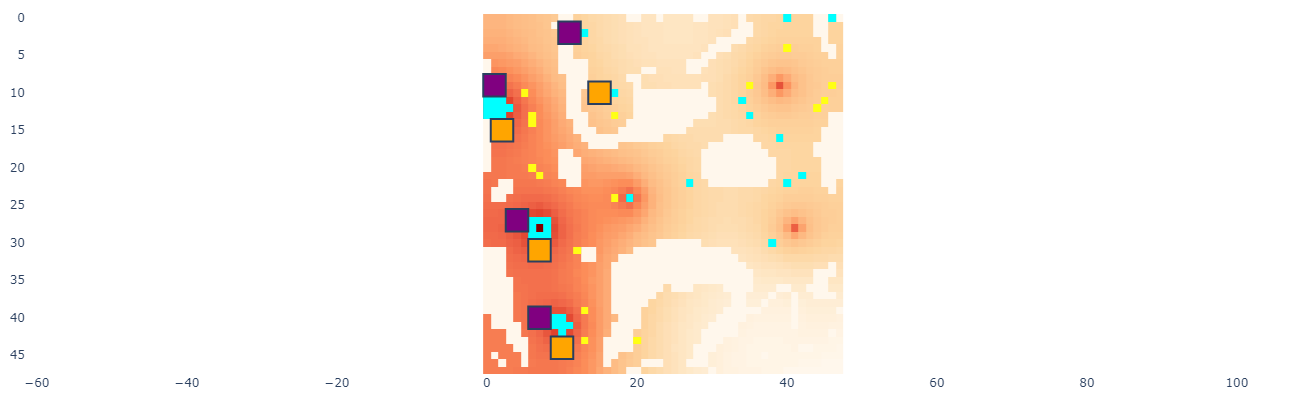

In [44]:
# Run the early_setup phase
agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
agent = agents["player_0"]
obs = env.reset(seed=42)  # resets an environment with a seed
step = 0

while env.state.real_env_steps < 0:
    actions = {}
    for player in env.agents:
        o = obs[player]
        acts = agents[player].early_setup(step, o)
        actions[player] = acts
    step += 1
    obs, rewards, dones, infos = env.step(actions)
# plt.imshow(env.render("rgb_array", width=640, height=640))
show_env(env)

## Run one step at a time

In [45]:
all_actions = {}

INFO:root:player_0 Beginning of step update for step 26
INFO:root:player_0 player_0 Unit actions: {}
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 Beginning of step update for step 26
INFO:root:player_1 player_1 Unit actions: {}
INFO:root:player_1 player_1 Factory actions: {}


Carrying out step 26


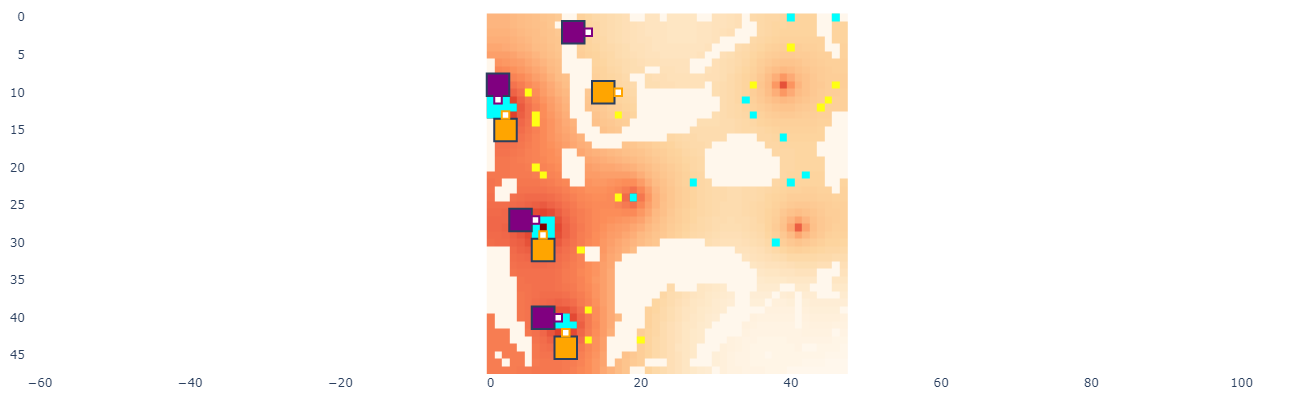

In [63]:
print(f"Carrying out step {step}")
actions = {player: agent.act(step, obs[player]) for player, agent in agents.items()}
all_actions[step] = actions  # Just for debugging
step += 1
obs, rewards, dones, infos = env.step(actions)
# plt.imshow(env.render("rgb_array", width=640, height=640))
show_env(env)

In [150]:
a = env.get_state().units["player_0"]["unit_11"]
t = a.action_queue[-1]

In [166]:
t.state_dict()

array([ 1,  0,  0, 60,  1,  1])

In [136]:
class A:
    def __init__(self):
        self.v = {"a": 4}


a = A()

{}

In [60]:
game_state_from_env(env).board.factory_occupancy_map[4, 27]

2

In [66]:
for act in a:
    print(act.state_dict())

[0 4 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[0 3 0 0 0 1]
[0 4 0 0 0 1]
[ 2  0  4 80 -1  1]
[ 0  3  0  0 -1  1]
